![](https://www.uautonoma.cl/content/themes/universidad-autonoma-theme/dist/images/global/logo.svg)

# Tarea: Análisis Visual de Ventas de Tienda de Conveniencia

### **Equipo:**
Joseph Angel Bautista Aldave

Sebastian Ignacio Gonzalez Aguilera

Erwin Héctor Gutiérrez Ruiz

Juan Pablo Hernandez Orellana

Constanza Del Rosario Piñones Silva
### **Grupo:** 13
### **Curso:** Visualización de Datos en Python

## Descripción del Caso

Una cadena de tiendas de conveniencia quiere analizar sus ventas y el comportamiento de los clientes para mejorar su estrategia de marketing. Para ello, han recopilado un conjunto de datos que incluye información sobre las ventas, los productos y los clientes. Su misión será usar las técnicas de visualización de datos aprendidas para analizar y presentar los resultados de este conjunto de datos.

## Indicaciones Generales

1.  **Dataset:** Utilizarán el dataset "Supermarket Sales" disponible en Kaggle (data.csv).
2.  **Entorno:** Trabajen según las indicaciones de este notebook.
3.  **Colaboración:** Esta es una tarea grupal. Asegúrense de coordinar el trabajo.
4.  **Streamlit:** Se requiere crear un dashboard interactivo usando la librería Streamlit. Deberán escribir y ejecutar su código como script the python (archivo .py), pero deben también escribir el código en una celda dentro de éste jupyter notebook para su revisión.
5.  **Pensamiento Crítico:** Incluyan reflexiones y justificaciones para sus elecciones de visualización y análisis.
6.  **Entrega:** Entreguen este notebook completado según las indicaciones.

## 1. Selección de Variables y desarrollo de Análisis


## 1.1 Exploración

### **Importancia del Análisis Exploratorio de Datos (EDA)**

Antes de iniciar cualquier proceso de visualización, es fundamental realizar una **exploración estructurada del conjunto de datos**. Este paso permite conocer la **composición**, la **calidad** y el **tipo de información disponible**, facilitando así la **selección de variables clave para el análisis**.

Identificar qué **atributos son más relevantes** en función del **contexto de negocio** —como **ventas**, **comportamiento del cliente** o **rendimiento por sucursal**— es una práctica esencial para garantizar que los resultados posteriores sean **significativos y accionables**.

Este enfoque **exploratorio y analítico** forma parte del proceso conocido como **análisis exploratorio de datos (EDA)**, una etapa crítica que ayuda a construir una **base sólida** para las siguientes fases del estudio (**Han, Pei, & Kamber, 2011**).

In [5]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("data.csv")

# Ver las primeras filas
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
# Ver la estructura general del DataFrame: tipos de datos, valores nulos, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
# Convertir la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Convertir la columna 'Time' a tipo datetime solo para extraer la hora
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')

# Crear nuevas columnas útiles para análisis temporal
df['Day'] = df['Date'].dt.day_name()       # Nombre del día (e.g., Monday)
df['Month'] = df['Date'].dt.month_name()   # Nombre del mes (e.g., January)
df['Hour'] = df['Time'].dt.hour            # Hora de la transacción (número entero)

### Revisión estadística

La función **`describe()`** permite generar **estadísticas descriptivas básicas** para todas las **variables numéricas** del conjunto de datos. Esta información es fundamental para comprender la **dispersión**, los **valores centrales** (como la **media** o la **mediana**), y los **extremos** (**mínimos y máximos**) de cada variable.

Con estos datos es posible identificar posibles **sesgos**, **rangos atípicos**, o **valores que podrían influir desproporcionadamente** en los resultados. Además, estas estadísticas permiten reconocer la **escala de las variables**, lo que es importante para posteriores **visualizaciones comparativas** o **análisis multivariados** (**McKinney, 2017**).

Este paso reafirma la importancia de variables como **Total**, **gross income**, **Quantity** y **Rating**, que muestran **suficiente variabilidad** y **significado comercial** como para ser consideradas en el análisis.


In [9]:
# Estadísticas descriptivas de columnas numéricas
df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,1900-01-01 15:24:41.879999744,307.58738,4.761905e+00,15.379369,6.97270,14.910000
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,1900-01-01 10:00:00,10.17000,4.761905e+00,0.508500,4.00000,10.000000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,1900-01-01 12:43:00,118.49750,4.761905e+00,5.924875,5.50000,12.000000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,1900-01-01 15:19:00,241.76000,4.761905e+00,12.088000,7.00000,15.000000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,1900-01-01 18:15:00,448.90500,4.761905e+00,22.445250,8.50000,18.000000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,1900-01-01 20:59:00,993.00000,4.761905e+00,49.650000,10.00000,20.000000
std,26.494628,2.923431,11.708825,245.885335,NaN,NaN,234.17651,6.131498e-14,11.708825,1.71858,3.186857


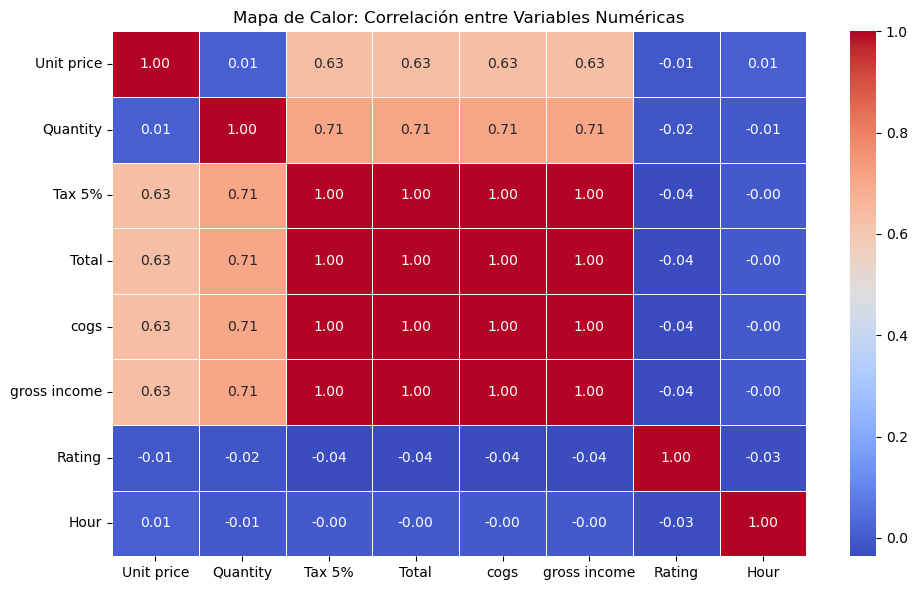

In [20]:
#@title Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de variables numéricas relevantes para el heatmap
numerical_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating', 'Hour']

# Calcular la matriz de correlación
corr = df[numerical_cols].corr()

# Visualización con mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor: Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()

 **Análisis de Correlaciones entre Variables Numéricas**

Se destaca una **fuerte correlación perfecta (1.00)** entre las variables **Total**, **Tax 5%**, **gross income** y **cogs**. Esto es esperable, ya que estas variables están **directamente derivadas unas de otras**: por ejemplo, **gross income** representa un **5% del cogs**, y **Total** es la **suma de ambos**. Esta **colinealidad** justifica que **no todas deban utilizarse al mismo tiempo** en ciertos modelos estadísticos, aunque sí son relevantes para **análisis descriptivos de ventas**.

También se observa una **correlación moderada (0.63 - 0.71)** entre **Unit price** y las variables relacionadas con ingresos (**Total**, **cogs**, **gross income**), esperable, ya que el **precio unitario influye** de forma importante en el **monto total de la venta**. A su vez, **Quantity** presenta una correlación similar con esas mismas variables, indicando que el **volumen de productos vendidos también impacta directamente en los ingresos**.

En contraste, la variable **Rating**, que representa la **evaluación del cliente**, **no presenta correlaciones significativas** con las demás variables numéricas. Esto puede indicar que las **valoraciones de los clientes no están relacionadas directamente con el monto de compra, el precio ni la cantidad**, lo cual podría ser relevante para **estudios de experiencia del cliente** más allá de los resultados de ventas.

Finalmente, la variable **Hour** no parece tener **correlaciones lineales fuertes** con ninguna otra variable. Sin embargo, esto **no significa que no sea útil**: podría seguir siendo relevante para **detectar patrones temporales de comportamiento de compra** cuando se la analice **categóricamente** (por ejemplo, **horas pico**).

**Visualización con pairplot**

El gráfico **pairplot** permite visualizar simultáneamente la **distribución univariada** de las **variables numéricas** y sus **relaciones bivariadas**. Este tipo de visualización es especialmente útil para detectar **patrones generales**, posibles **agrupaciones**, **asimetrías** o **relaciones no lineales** que no siempre se evidencian en las **métricas estadísticas tradicionales**.

Su uso es una **práctica recomendada** dentro del **análisis exploratorio de datos (EDA)** para **validar y refinar la comprensión** sobre la **estructura interna del conjunto de datos** (**Dasgupta et al., 2021**).




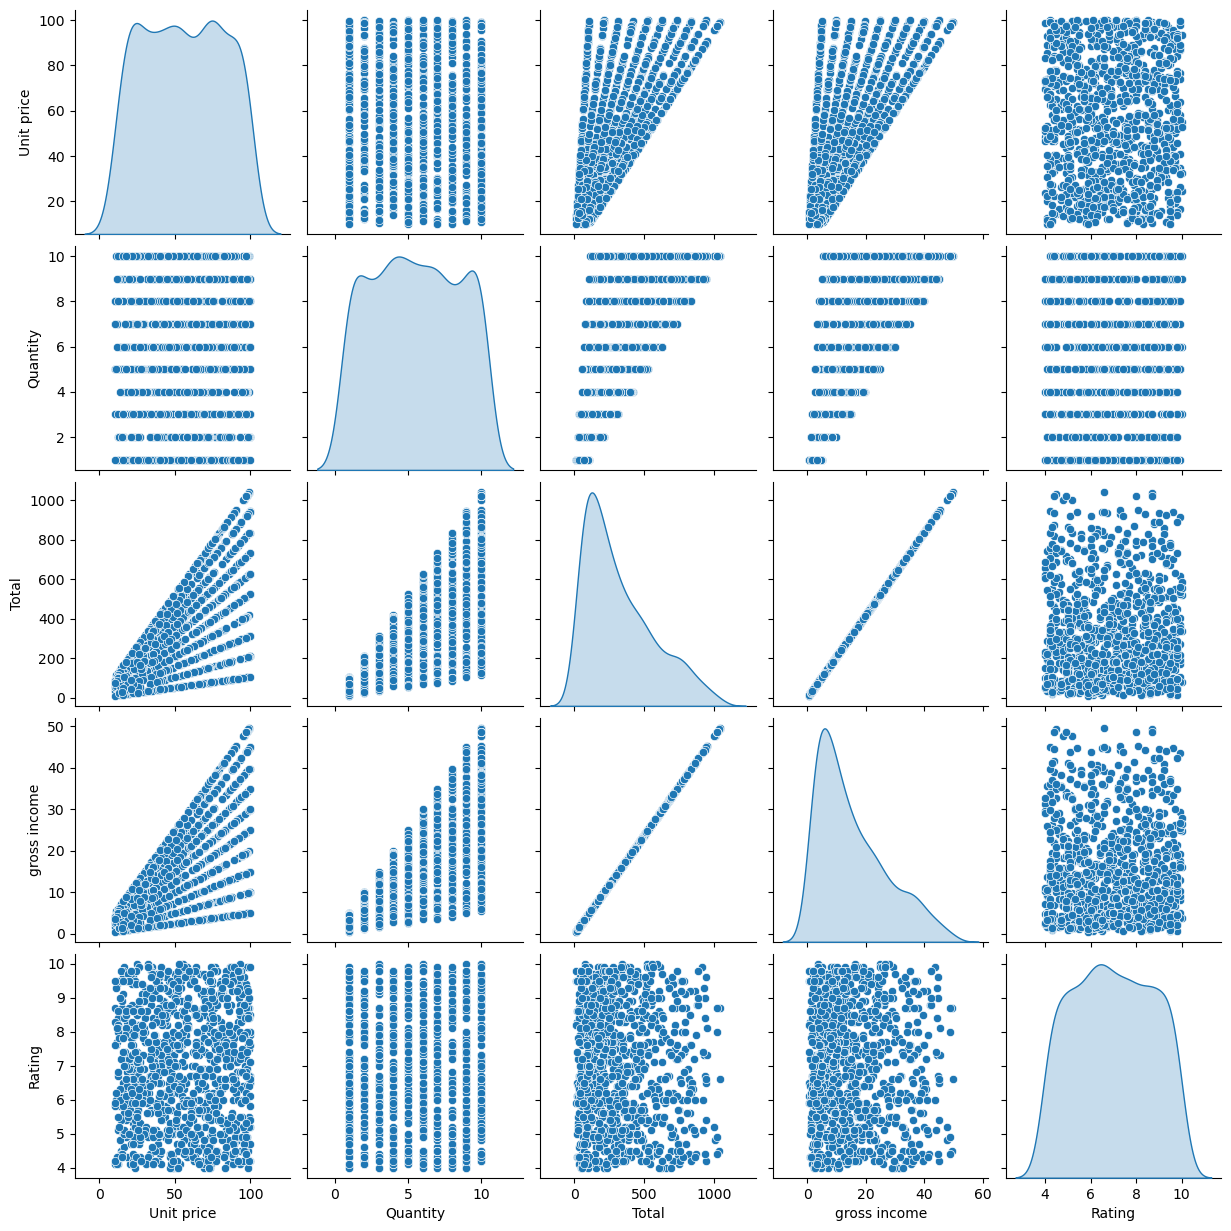

In [21]:
#@title Pairplot
import seaborn as sns

# Subconjunto de variables numéricas relevantes
subset = df[['Unit price', 'Quantity', 'Total', 'gross income', 'Rating']]

# Pairplot para explorar relaciones visuales entre variables
sns.pairplot(subset, diag_kind='kde')

**Interpretación del Gráfico de Dispersión de Pares (Pairplot)**

El **gráfico de dispersión de pares (pairplot)** ofrece una **visión clara de las relaciones** entre las **variables numéricas** del conjunto de datos. Lo más destacable es la **alineación exacta** entre **Total**, **gross income** y **cogs**, lo que evidencia que estas variables están **funcionalmente relacionadas**. Aunque esto podría sugerir **redundancia**, su inclusión en el análisis resulta válida según el **propósito**: por ejemplo, **Total** como **variable comercial directa** y **gross income** como **métrica de rentabilidad**.

Por otro lado, la variable **Rating** muestra un **patrón completamente disperso** frente a todas las demás variables, lo que indica que **no hay una relación directa** entre la **evaluación del cliente** y el **volumen o monto de compra**. Esta **independencia** respalda su valor como **variable cualitativa complementaria** para estudios de **satisfacción**, **experiencia de compra** o **percepción de servicio**.

Las **distribuciones diagonales** permiten observar además que variables como **gross income** y **Total** presentan una **asimetría positiva (sesgo a la derecha)**, lo cual es coherente con escenarios reales donde las **ventas elevadas son menos frecuentes** que las de menor valor.

#**Análisis y Selección Final de Variables Clave**

A continuación se presenta una tabla con las **variables clave** seleccionadas para el análisis de **comportamiento de ventas y clientes**, su **tipo**, y una **justificación**:

| **Variable**       | **Tipo**     | **Justificación de negocio** |
|--------------------|--------------|-------------------------------|
| **Date**           | **Temporal** | Permite estudiar el comportamiento de ventas por **día, mes o estacionalidad**. Fundamental para **planificar campañas** o **detectar caídas**. |
| **Hour**           | **Temporal** | Nos indica las **horas pico de ventas**, útil para **gestión de personal** y **promociones temporales**. |
| **Branch**         | **Categórica** | Identifica las **sucursales**. Permite **comparar rendimiento** entre tiendas. |
| **City**           | **Categórica** | Posibilita **análisis geográficos**, comportamiento por **zona o nivel socioeconómico**. |
| **Customer type**  | **Categórica** | Distingue entre **clientes recurrentes y nuevos**. Ayuda a diseñar **estrategias de fidelización**. |
| **Gender**         | **Categórica** | Explora si existen **diferencias en el comportamiento de compra** según género. |
| **Product line**   | **Categórica** | Muestra cuáles **líneas de productos generan más ingresos o ventas**. Clave para **gestión de inventario y marketing**. |
| **Unit price**     | **Numérica** | Valor de venta unitario. Esencial para identificar productos **premium vs. accesibles**. |
| **Quantity**       | **Numérica** | Ayuda a entender la **magnitud de cada compra**, útil para **ticket promedio** o **promociones por volumen**. |
| **Total**          | **Numérica** | **Ingreso total por transacción**. Métrica clave para **performance económica**. |
| **Payment**        | **Categórica** | Permite analizar **métodos de pago preferidos** por los clientes. |
| **Rating**         | **Numérica** | Refleja la **percepción del cliente sobre su experiencia**. Relacionable con variables como **producto o sucursal**. |


#**Reflexiones de Negocio**

 **Preguntas estratégicas** que se pueden responder utilizando las variables seleccionadas:

- **¿Qué días y horas concentran más ventas?**
- **¿Qué sucursal genera más ingresos?**
- **¿Qué productos son más vendidos? ¿A qué tipo de clientes?**
- **¿Existen diferencias de comportamiento entre hombres y mujeres?**
- **¿Cuál es el ticket promedio por tipo de cliente?**
- **¿Qué método de pago es el más utilizado?**
- **¿Hay relación entre calificación y ciudad, producto o género?**

# 2. Analísis Gráfico

## Análisis Requeridos:

1.  **Evolución de las Ventas Totales:**
    *   **Objetivo:** Mostrar cómo han variado las ventas totales (`Total`) a lo largo del tiempo (`Date`).

2.  **Ingresos por Línea de Producto:**
    *   **Objetivo:** Comparar los ingresos (`Total`) generados por cada `Product line`.

3.  **Distribución de la Calificación de Clientes:**
    *   **Objetivo:** Analizar la distribución de las calificaciones (`Rating`) de los clientes.

4.  **Comparación del Gasto por Tipo de Cliente:**
    *   **Objetivo:** Comparar la distribución del gasto total (`Total`) entre clientes `Member` y `Normal`.

5.  **Relación entre Costo y Ganancia Bruta:**
    *   **Objetivo:** Visualizar la relación entre el costo de bienes vendidos (`cogs`) y el ingreso bruto (`gross income`).

6.  **Métodos de Pago Preferidos:**
    *   **Objetivo:** Identificar los métodos de pago (`Payment`) más frecuentes.

7.  **Análisis de Correlación Numérica:**
    *   **Objetivo:** Explorar relaciones lineales entre variables numéricas (`Unit price`, `Quantity`, `Tax 5%`, `Total`, `cogs`, `gross income`, `Rating`).

8.  **Composición del Ingreso Bruto por Sucursal y Línea de Producto:**
    *   **Objetivo:** Mostrar la contribución de cada `Product line` al `gross income` dentro de cada `Branch`.

---

## Requisitos Adicionales:
*   Implementación en Streamlit.
*   Gráficos claros (títulos, etiquetas).
*   Interactividad (filtros) donde sea apropiado.
*   Aplicación de buenas prácticas de visualización (claridad).

In [23]:
import plotly.express as px

# Agrupar por fecha
ventas_diarias = df.groupby('Date')['Total'].sum().reset_index()

# Gráfico interactivo
fig = px.line(
    ventas_diarias,
    x='Date',
    y='Total',
    title='Evolución de las Ventas Totales',
    markers=True,
    labels={'Date': 'Fecha', 'Total': 'Ventas Totales (USD)'}
)

# Personalización opcional
fig.update_traces(line_color='darkorange')
fig.update_layout(
    xaxis_title='Fecha',
    yaxis_title='Ventas Totales (USD)',
    title_x=0.5,
    template='plotly_white'
)

fig.show()


El gráfico muestra las ventas totales (`Total`) agrupadas por día (`Date`) a lo largo del primer trimestre de 2019. A partir de la visualización, se pueden destacar los siguiente elementos importantes.

**Alta variabilidad diaria de las ventas:**

Es posible evidenciar que existe una fuerte fluctuación en las ventas diarias. Se pueden visualizar dias con ingresos de 934 USD y otros que superan los 7.400 USD, lo que indica un comportamiento volátil en las ventas totales.

**Sin una tendencia clara de crecimiento o decrecimiento:**

No se identifica una tendencia lineal ascendente o descendente a lo largo del tiempo. Las ventas suben y bajan de forma irregular, lo que genera un cierto nivel de incertidumbre respecto a futuras proyecciones que se podrian realizar.

**Maximos específicos:**

Se identifican ciertos días con niveles de venta significativamente superiores al promedio, lo cual podría estar asociado a campañas promocionales, aumento temporal en la demanda o actividades comerciales extraordinarias.

**Posibles días bajos constantes:**

También hay varios puntos bajos recurrentes que podrían coincidir con fines de semana o días de menor afluencia.

In [24]:
import plotly.express as px
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')
df['Day'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()
df['Hour'] = df['Time'].dt.hour
orden_meses = ['January', 'February', 'March']
df['Month'] = pd.Categorical(df['Month'], categories=orden_meses, ordered=True)

ventas_mes = df.groupby('Month')['Total'].sum().reset_index()

fig = px.bar(
    ventas_mes,
    x='Month',
    y='Total',
    color='Month',
    title='Ventas Totales por Mes',
    labels={'Total': 'Ventas Totales (USD)', 'Month': 'Mes'}
)

fig.update_layout(template='plotly_white', title_x=0.5, showlegend=False)
fig.show()

C:\Users\sebas\AppData\Local\Temp\ipykernel_39560\1005455805.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



El gráfico muestra la distribución de las ventas totales durante los tres primeros meses del año. Se observa una diferencia significativa entre los niveles de ingresos mensuales, lo cual permite identificar comportamientos relevantes en la actividad comercial del trimestre.


**Enero destaca como el mes con mayores ventas:**

Se registra un volumen de ventas superior a los 115.000 USD, lo que sugiere una fuerte actividad comercial, posiblemente asociada a compras de inicio de año o campañas específicas.

**Febrero presenta una caída notoria:**

Es el mes con el menor total de ingresos del trimestre, con ventas cercanas a los 98.000 USD. Esto podría estar influenciado por la menor cantidad de días del mes o por una baja natural en la demanda posterior a las compras de enero.

**Marzo recupera parte del dinamismo:**

Con ventas en torno a los 110.000 USD, marzo evidencia una recuperación respecto a febrero, aunque sin alcanzar el nivel de enero.

2.  **Ingresos por Línea de Producto:**
    *     Con el objetivo de identificar cuáles son las líneas de productos más rentables, se analizaron los ingresos totales generados por cada categoría (`Product line`). Esta comparación permite visualizar qué áreas concentran mayores ventas y podrían representar focos estratégicos para la toma de decisiones comerciales.

In [25]:
import plotly.express as px

# Agrupar por línea de producto
ventas_por_producto = df.groupby('Product line')['Total'].sum().reset_index()
ventas_por_producto = ventas_por_producto.sort_values(by='Total', ascending=True)

# Gráfico de barras interactivo
fig = px.bar(
    ventas_por_producto,
    x='Total',
    y='Product line',
    orientation='h',
    title='Ingresos por Línea de Producto',
    labels={'Total': 'Ingresos Totales (USD)', 'Product line': 'Línea de Producto'},
    color='Product line'
)

# Personalización
fig.update_layout(
    title_x=0.5,
    template='plotly_white'
)

fig.show()

El gráfico compara los ingresos totales (`Total`) acumulados por cada línea de producto (`Product line`). A partir de esta visualización, se pueden extraer varios insights relevantes:

**Relativa equidad entre categorías:**

Las seis líneas de productos presentan niveles de ingreso bastante similares, lo que sugiere una diversificación equilibrada en la oferta comercial. No hay una categoría que concentre de forma extrema la mayoría de las ventas.

**Ligeras diferencias en el rendimiento:**

Las líneas Food and beverages, Sports and travel y Electronic accessories muestran un desempeño ligeramente superior, superando los 54.000 USD en ingresos. Esto indica una preferencia moderada por estos tipos de productos.

**Health and beauty en último lugar:**

Aunque la diferencia no es drástica, esta categoría es la que menor ingreso genera, con un total cercano a los 50.000 USD. Esto podría reflejar una menor rotación o menor ticket promedio de compra.

In [26]:
import plotly.express as px

# Asegurarse de que 'Month' esté correctamente categorizada
orden_meses = ['January', 'February', 'March']
df['Month'] = pd.Categorical(df['Month'], categories=orden_meses, ordered=True)

# Agrupar por mes y línea de producto
ventas_producto_mes = df.groupby(['Month', 'Product line'])['Total'].sum().reset_index()

# Crear gráfico interactivo
fig = px.bar(
    ventas_producto_mes,
    x='Product line',
    y='Total',
    color='Month',
    barmode='group',
    title='Ingresos por Línea de Producto según el Mes',
    labels={'Total': 'Ingresos Totales (USD)', 'Product line': 'Línea de Producto', 'Month': 'Mes'}
)

fig.update_layout(template='plotly_white', title_x=0.5)
fig.show()

C:\Users\sebas\AppData\Local\Temp\ipykernel_39560\1067079181.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Este gráfico presenta los ingresos generados por cada línea de producto, desglosados por mes (`January`,`February`,`March`). Esta vista más detallada permite identificar patrones estacionales o fluctuaciones específicas dentro de cada categoría.

**Variabilidad mensual significativa en algunas categorías:**

Productos como Home and lifestyle y Sports and travel presentan diferencias marcadas entre meses. En particular, Home and lifestyle muestra un descenso en febrero y una recuperación en marzo, mientras que Sports and travel tuvo su punto más alto en enero y fue disminuyendo en los meses siguientes.

**Estabilidad en otras líneas:**

Categorías como Electronic accessories, Fashion accessories y Food and beverages se mantienen relativamente constantes a lo largo del trimestre, con variaciones menores entre meses, lo que sugiere una demanda más estable.

**Crecimiento en Health and beauty:**

A diferencia de otras categorías, Health and beauty muestra una evolución ascendente, alcanzando su mejor desempeño en marzo. Esto podría indicar una tendencia positiva o el efecto de acciones promocionales específicas hacia fin de trimestre.